# Praca domowa nr 8

## Wprowadzenie
Tematem pracy domowej jest przygotowanie wizualizacji utworzonej w wykorzystaniem `matplotlib`a i `seaborn`a. Ma to być poprawa wybranej wizualizacji, która ukazała się w ciągu ostatnich dwóch tygodni w prasie, telewizji lub internecie. 

## Wykres źródłowy
Wizualizacja, którą wybrałem do poprawy pochodzi z konferencji Prezesa Rady Ministrów nt. Tarczy Finansowej 2.0 i dotyczy poziomu bezrobocia w Unii Europejskiej. Konferencja ta odbyła się 26 listopada. News o niej znajdziemy zapewne w każdym portalu informacyjnym. Ja załączam [*link*](https://www.gov.pl/web/premier/kolejne-wsparcie-dla-przedsiebiorcow--rusza-tarcza-finansowa-pfr-20) do informacji na stronie www.gov.pl oraz [*link*](https://www.youtube.com/watch?v=fjVS1fnaGlA) do nagrania z konferencji. 

Poprawiana wizualizacja wygląda tak: 
![original](original.png)



## Co jest nie tak?

Ukazany wykres może na pierwszy rzut oka wydawać się estetyczny, ale gdy się mu lepiej przyjrzymy można zauważyć szereg problemów:
- słupki 3D, utrudniające odbiór,
- "dziura na osi x" (jasne, że na wykresie przedstawione są wybrane państwa (i nie tylko państwa, o czym w punkcie niżej), ale okazuje się, że dziura ta wcale nie symbolizuje brakujących państw - nie wszystkie brakujące słupki znalazłyby się w tym przedziale (właściwie byłby to tylko jeden słupek),
- wmieszanie wśród państw także kategorii będących grupami państw - cała Unia i strefa euro, nie wyróżnienie ich w żaden sposób,
- dodatkowe podświetlenie(?) grupy państw, gdzie znalazła się też Polska.


Na wykresie jest informacja, że dane dotyczą stanu na 24.11.2020. Niestety dane dostępne w Eurostacie na dzisiaj (przynajmniej dla zwykłego użytkownika) są inne, być może zaktualizowane. Natomiast znalazłem [*raport*](https://ec.europa.eu/eurostat/documents/2995521/10663786/3-30102020-CP-EN.pdf/f93787e0-0b9a-e10e-b897-c0a5f7502d4e), w którym dane na stronie czwartej za wrzesień pokrywają się z tymi ukazanymi na wizualizacji. **Prawie.** Jedyna różnica jest w wartości poziomu bezrobocia w strefie Euro - w raporcie jest to 8.3%, a na wykresi 7.3%. Szczerze mówiąc, chciałbym wierzyć, że to kwestia innych danych, a nie literówki grafika przepisującego dane z raportu, bo to jednak wizualizacja, którą widziało wiele ludzi. 

## Podejście nr 1
Przedstawienie na wykresie wszystkich dostępnych danych dla krajów unijnych i wyłączenie danych dla grup państw - przedstawienie ich jako dodatkowe linie na wykresie. Subtelniejsze uwydatnienie wartości dla Polski. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Nie ma tych danych w postaci zbioru danych, musiałem je przepisać ręcznie ze wspomnianego raportu :(

In [2]:
countries = ["Strefa euro", "Unia Europejska", "Belgia", "Bułgaria", "Czechy", "Dania", "Niemcy",
"Irlandia", "Hiszpania", "Francja", "Chorwacja", "Włochy", "Cypr", "Łotwa", "Litwa",
"Luksemburg", "Malta", "Niderlandy", "Austria", "Polska", "Portugalia", "Rumunia",
"Słowenia", "Słowacja", "Finlandia", "Szwecja"]
unemployment = [8.3, 7.5, 5.2, 6.2, 2.8, 6.1, 4.5, 5.4, 16.5, 7.9, 8.2, 9.6, 8.0,
             8.4, 9.8, 6.7, 4.0, 4.4, 5.5, 3.1, 7.7, 5.2, 4.7, 6.8, 8.3, 9.2]

In [3]:
def set_color1(row):
    if row["country"] == "Polska":
        return "steelblue"
    else:
        return "skyblue"

In [4]:
df = pd.DataFrame({"country" : countries, "unemployment" : unemployment})

In [5]:
df_plot1 = df[2:].sort_values("unemployment").reset_index(drop = True)
df_plot1["color"] = df_plot1.apply(lambda row: set_color1(row), axis = 1)

In [6]:
ue = df.loc[df["country"] == "Unia Europejska", "unemployment"].values[0]
euro = df.loc[df["country"] == "Strefa euro", "unemployment"].values[0]

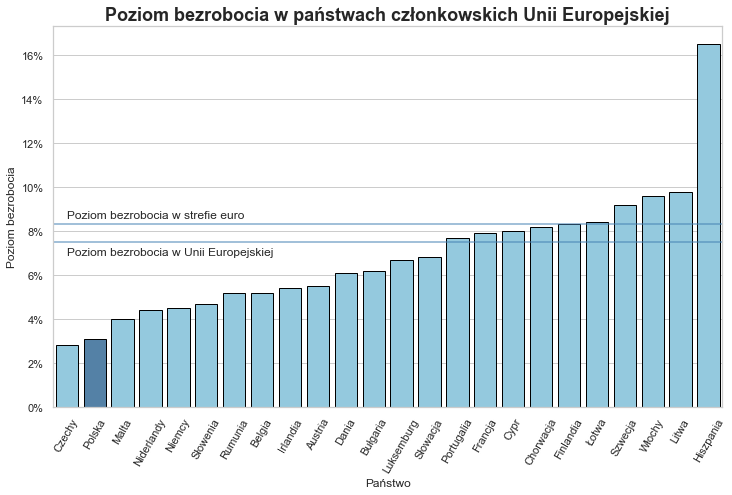

In [7]:
sns.set(rc={'figure.figsize':(12,7)}, style = "whitegrid")
ax = sns.barplot(data = df_plot1, x = "country", y = "unemployment", palette = df_plot1["color"], edgecolor = "black")
plt.xticks(rotation=60)
ax.set_title("Poziom bezrobocia w państwach członkowskich Unii Europejskiej", weight = "bold", size = 18)
ax.set_xlabel("Państwo")
ax.set_ylabel("Poziom bezrobocia")
ax.set_yticklabels(['{:.0%}'.format(x/100) for x in ax.get_yticks()])
plt.plot([-0.5, len(df_plot1)-0.5], [ue, ue], linewidth=2, alpha = 0.5, color = "steelblue")
plt.plot([-0.5, len(df_plot1)-0.5], [euro, euro], linewidth=2, alpha = 0.5, color = "steelblue")
plt.xlim(-0.5, len(df_plot1)-0.5)
plt.text(0, ue-0.6, s = 'Poziom bezrobocia w Unii Europejskiej')
plt.text(0, euro+0.3, s = 'Poziom bezrobocia w strefie euro')
plt.show()

## Dlaczego wykres jest lepszy? 
- słupki 2D z obramówką - proste, łatwe do porównania, nie powodują problemów z odczytem, 
- nie ma dziwnej dziury na osi X,
- przedstawienie danych dla grup państw w inny sposób - jako dodatkowe linie,
- wyróżnienie Polski w przyjemniejszy dla oka (to może być subiektywne) sposób. 

Należy powiedzieć, że państw jest dość dużo, dlatego dodanie etykiet spowodowałoby zaciemnienie obrazu, wykres byłby mocno nieczytelny. Dlatego drugim zasadnym podejściem jest wybór pewnych państw, które przedstawimy na wykresie...

## Podejście nr 2
Przedstawienie wartości dla wybranych państw i grup państw. 

In [8]:
df_plot2 = df[df["country"].isin(["Czechy", "Polska", "Malta", "Niemcy", "Słowacja", "Francja", 
                       "Cypr", "Chorwacja", "Włochy", "Litwa", "Hiszpania"])].sort_values("unemployment")
df_plot2 = df_plot2.append(df[:2])

In [9]:
def set_color2(row):
    if row["country"] == "Unia Europejska" or row["country"] == "Strefa euro":
        return "steelblue"
    else:
        return "skyblue"

In [10]:
df_plot2["color"] = df_plot2.apply(lambda row: set_color2(row), axis = 1)

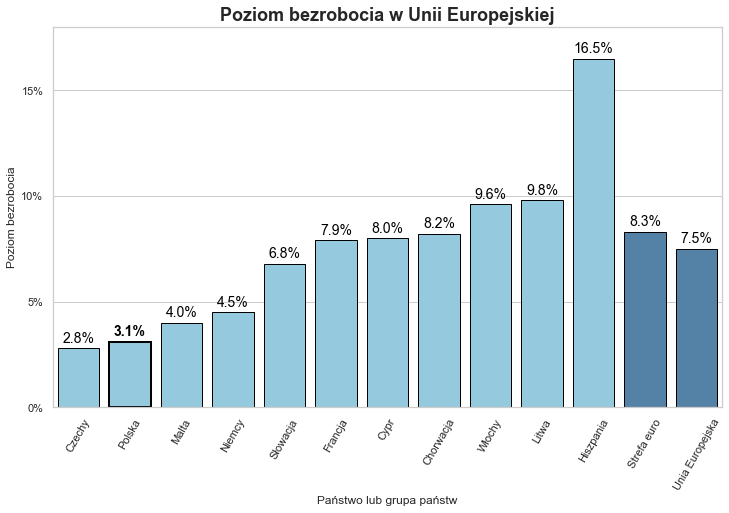

In [12]:
ax = sns.barplot(data = df_plot2, x = "country", y = "unemployment", palette = df_plot2["color"], edgecolor = "black")
plt.xticks(rotation=60)
ax.set_title("Poziom bezrobocia w Unii Europejskiej", weight = "bold", size = 18)
ax.set_xlabel("Państwo lub grupa państw")
ax.set_ylabel("Poziom bezrobocia")
ax.set_yticks(np.arange(0, 18, 5))
ax.set_yticklabels(['{:.0%}'.format(x/100) for x in ax.get_yticks()])
ax.set_ylim(0, 18)
for p in ax.patches:
    if p.get_x() == 0.6:
        p.set_linewidth(2)
        ax.annotate(format(p.get_height(), '.1f')+"%", 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = "center", va = "center", 
                   xytext = (0, 10),
                   color = "black",
                   size = 14,
                   weight = "semibold",
                   textcoords = "offset points")
    else:
        ax.annotate(format(p.get_height(), '.1f')+"%", 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = "center", va = "center", 
                   xytext = (0, 10),
                   color = "black",
                   size = 14,
                   textcoords = "offset points")
plt.show()

## Dlaczego wykres jest lepszy? 
- słupki 2D z obramówką - proste, łatwe do porównania, nie powodują problemów z odczytem, 
- nie ma dziwnej dziury na osi X,
- przedstawienie danych dla grup państw w inny sposób - jako wydzielone słupki o innym kolorze,
- wyróżnienie Polski w przyjemniejszy dla oka (to może być subiektywne) sposób. 

Na tym wykresie zasadne było też dodanie wartości dla poszczególnych słupków.  